In [2]:
# Cell 1: Import necessary libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from PIL import Image
import pandas as pd
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import json


In [3]:
# Cell 2: Set up paths and configurations
# Get the current working directory
current_dir = os.getcwd()

# Define the base directory for the dataset
base_dir = os.path.join(current_dir, "data", "lgg-mri-segmentation", "kaggle_3m")

# Define the directory where your model checkpoints are saved
checkpoint_dir = os.path.join(current_dir, "outputs")

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [4]:
# Cell 3: Function to load training metrics
def load_training_metrics(run_dir):
    """Load training metrics from JSON file"""
    metrics_path = os.path.join(run_dir, 'training_metrics.json')
    if os.path.exists(metrics_path):
        with open(metrics_path, 'r') as f:
            return json.load(f)
    return None

In [5]:
# Cell 4: Find all model runs
def find_model_runs(checkpoint_dir):
    """Find all model run directories"""
    run_dirs = [d for d in os.listdir(checkpoint_dir) 
                if os.path.isdir(os.path.join(checkpoint_dir, d))]
    return sorted(run_dirs, reverse=True)  # Most recent first

In [6]:
# Print available runs
runs = find_model_runs(checkpoint_dir)
print(f"Found {len(runs)} model runs:")
for run in runs:
    print(f"- {run}")

Found 3 model runs:
- 20250512_231801
- 20250512_182850
- 20250512_154501


In [7]:
# Cell 5: Load metrics for all runs
run_metrics = {}
for run in runs:
    run_path = os.path.join(checkpoint_dir, run)
    metrics = load_training_metrics(run_path)
    if metrics:
        run_metrics[run] = metrics
    

In [8]:
# Cell 6: Find best model based on validation dice
def find_best_model(run_metrics):
    """Find the best model based on validation dice score"""
    best_val_dice = 0
    best_run = None
    
    for run, metrics in run_metrics.items():
        if 'val_dice' in metrics and metrics['val_dice']:
            max_val_dice = max(metrics['val_dice'])
            if max_val_dice > best_val_dice:
                best_val_dice = max_val_dice
                best_run = run
    
    return best_run, best_val_dice

best_run, best_val_dice = find_best_model(run_metrics)
print(f"Best run: {best_run}")
print(f"Best validation dice: {best_val_dice:.4f}")

Best run: 20250512_154501
Best validation dice: 0.7891


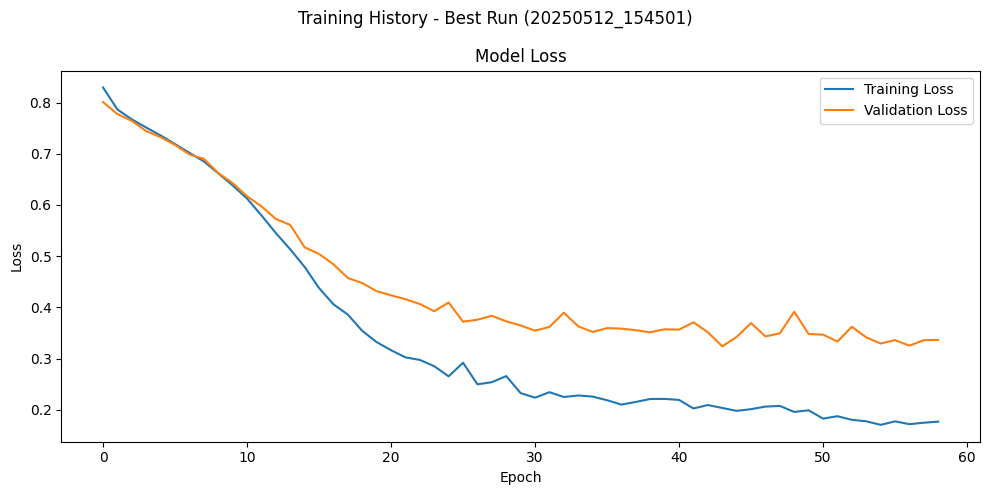

In [16]:
# Cell 7: Visualize training history
def plot_training_history(metrics, title):
    """Plot training and validation metrics"""
    plt.figure(figsize=(10, 5))
    
    # Plot loss
    plt.plot(metrics['train_loss'], label='Training Loss')
    plt.plot(metrics['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Plot history for best model
if best_run:
    plot_training_history(run_metrics[best_run], 
                         f'Training History - Best Run ({best_run})')

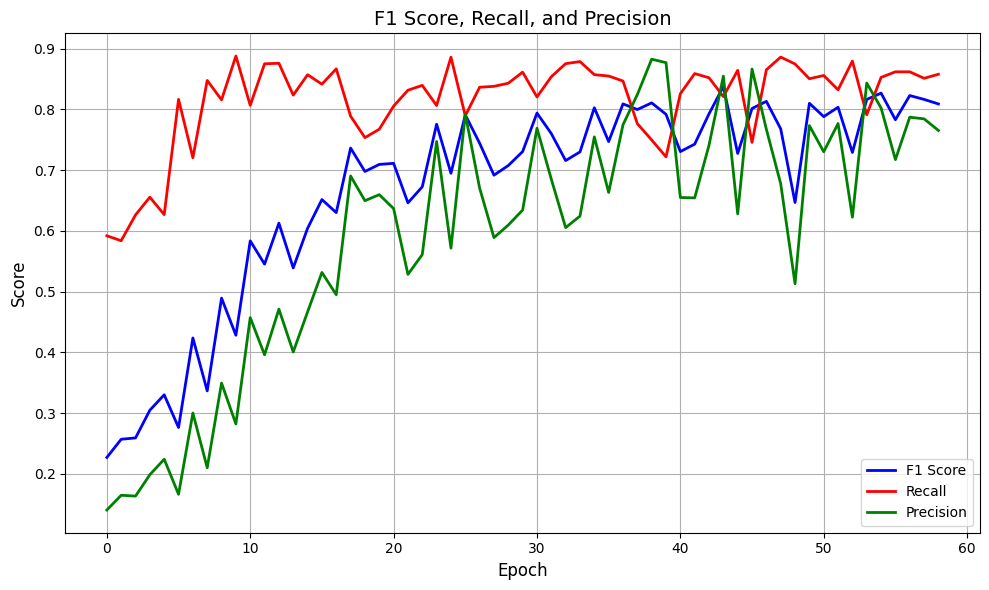

In [10]:
# Cell 8: F1, Recall, Precision
plt.figure(figsize=(10, 6))
plt.plot(run_metrics[best_run]['val_f1'], label='F1 Score', color='blue', linewidth=2)
plt.plot(run_metrics[best_run]['val_recall'], label='Recall', color='red', linewidth=2)
plt.plot(run_metrics[best_run]['val_precision'], label='Precision', color='green', linewidth=2)
plt.title('F1 Score, Recall, and Precision', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

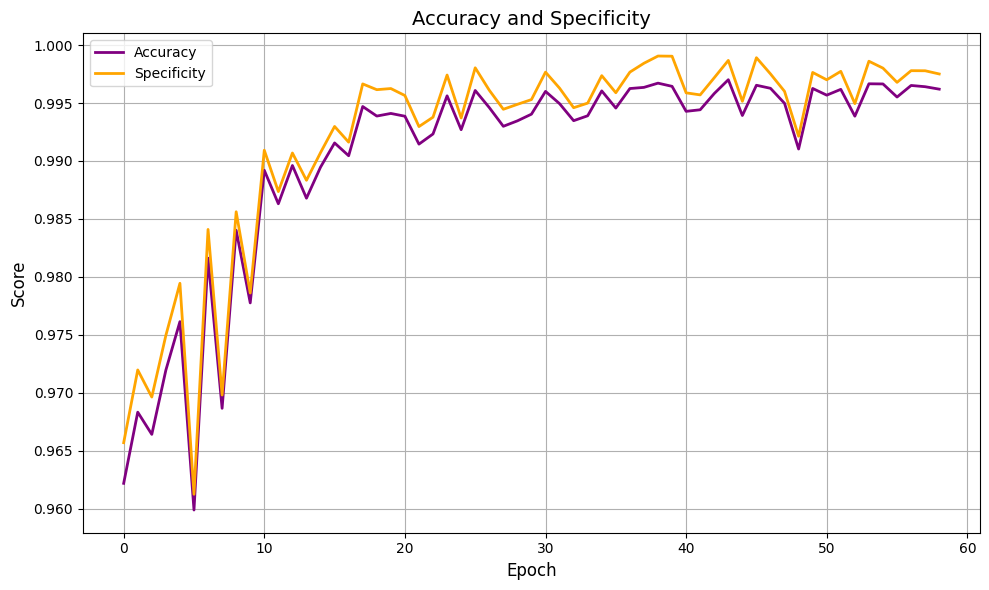

In [11]:
# Cell 9: Accuracy and Specificity
plt.figure(figsize=(10, 6))
plt.plot(run_metrics[best_run]['val_accuracy'], label='Accuracy', color='purple', linewidth=2)
plt.plot(run_metrics[best_run]['val_specificity'], label='Specificity', color='orange', linewidth=2)
plt.title('Accuracy and Specificity', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

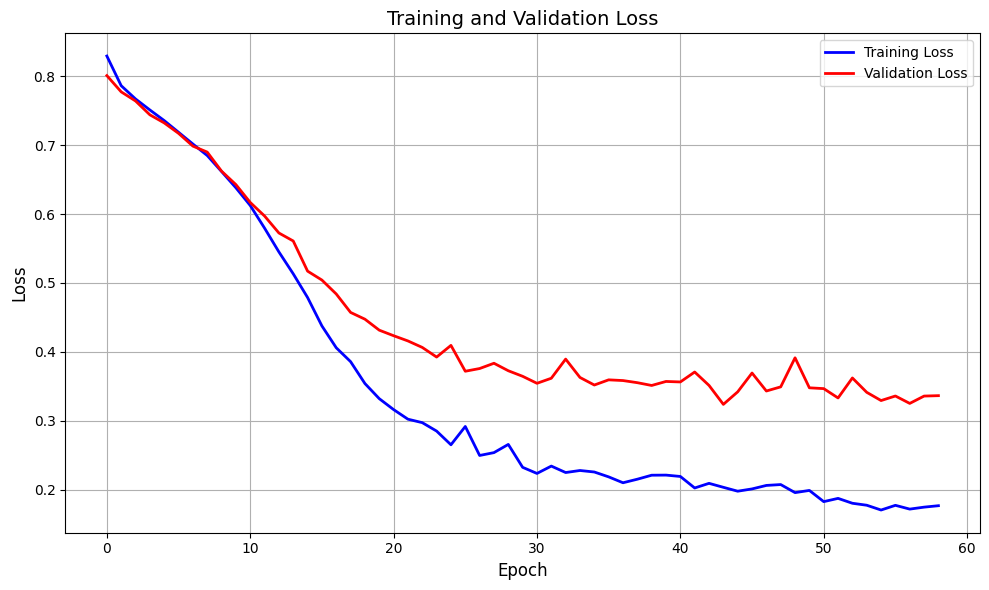

In [12]:
# Cell 10: Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(run_metrics[best_run]['train_loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(run_metrics[best_run]['val_loss'], label='Validation Loss', color='red', linewidth=2)
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

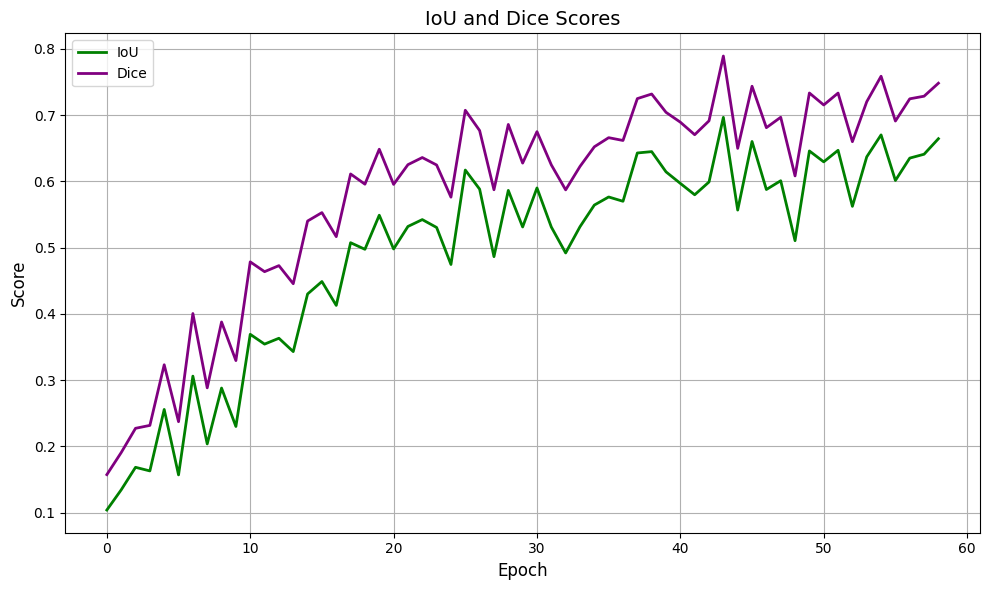

In [13]:
# Cell 11: IoU and Dice
plt.figure(figsize=(10, 6))
plt.plot(run_metrics[best_run]['val_iou'], label='IoU', color='green', linewidth=2)
plt.plot(run_metrics[best_run]['val_dice'], label='Dice', color='purple', linewidth=2)
plt.title('IoU and Dice Scores', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# Cell 12: Print best metrics
print("\nBest Values Achieved:")
print(f"F1 Score: {max(run_metrics[best_run]['val_f1']):.4f}")
print(f"Recall: {max(run_metrics[best_run]['val_recall']):.4f}")
print(f"Precision: {max(run_metrics[best_run]['val_precision']):.4f}")
print(f"Accuracy: {max(run_metrics[best_run]['val_accuracy']):.4f}")
print(f"Specificity: {max(run_metrics[best_run]['val_specificity']):.4f}")
print(f"Best IoU: {max(run_metrics[best_run]['val_iou']):.4f}")
print(f"Best Dice: {max(run_metrics[best_run]['val_dice']):.4f}")
print(f"Best Validation Loss: {min(run_metrics[best_run]['val_loss']):.4f}")


Best Values Achieved:
F1 Score: 0.8375
Recall: 0.8878
Precision: 0.8826
Accuracy: 0.9970
Specificity: 0.9991
Best IoU: 0.6966
Best Dice: 0.7891
Best Validation Loss: 0.3238
